<a href="https://colab.research.google.com/github/rlaehgns420/Datalab/blob/master/education.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##분석목적

지역별 수요분석과 예측을 통한 돌봄센터수 우선 배치 지역 선정

##R 연동하기

In [1]:
# activate R magic
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


## 패키지 불러오기 

In [ ]:
%%R
install.packages("readxl")

In [ ]:
%%R
install.packages("car")
install.packages("dplyr")
install.packages("MASS")
install.packages("leaps")
install.packages("corrgram")
install.packages("RColorBrewer")
install.packages("ggplot2")
install.packages("ggmap")

In [ ]:
%%R
library(readxl)

In [58]:
%%R
library(car)
library(dplyr)
library(MASS)
library(leaps)
library(corrgram)
library(RColorBrewer)
library(ggplot2)
library(ggmap)

R[write to console]: Loading required package: carData

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following object is masked from ‘package:car’:

    recode


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: 
Attaching package: ‘MASS’


R[write to console]: The following object is masked from ‘package:dplyr’:

    select


R[write to console]: Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus

R[write to console]: Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.

R[write to console]: Please cite ggmap if you use it! See citation("ggmap") for details.



## 파일 불러오기

In [96]:
#서울_학교돌봄현황.xlsx
%%R
seoul_total_raw              <- read_xlsx(file.choose())
head(seoul_total_raw)

Enter file name:서울_학교돌봄현황.xlsx


In [97]:
#서울_마을돌봄현황.xlsx
%%R
seoul_vil_dolbom_raw         <- read_xlsx(file.choose())
head(seoul_vil_dolbom_raw)

Enter file name:서울_마을돌봄현황.xlsx


In [98]:
#학생체력증진현황.xlsx
%%R
bmi_raw                      <- read_xlsx(file.choose())  
head(bmi_raw)

Enter file name:학생체력증진현황.xlsx


R[write to console]: New names:
* 인원 -> 인원...24
* `%` -> `%...25`
* 인원 -> 인원...26
* `%` -> `%...27`
* 인원 -> 인원...28
* ...



In [94]:
#서울_저소득및한부모가구수.txt
%%R
hanbumo_base_raw             <- read.table(file.choose(), sep='\t', header=T)
head(hanbumo_base_raw)

Enter file name:서울_저소득및한부모가구수.txt
  구군별.1. 합계_가구수..가구. 합계_가구원수..명.
1      합계             34,824             81,703
2    강남구              1,058              2,563
3    강동구              1,354              3,235
4    강북구              2,161              5,087
5    강서구              2,356              5,595
6    관악구              1,573              3,687
  국민기초생활보장법_가구수..가구. 국민기초생활보장법_가구원수..명.
1                           25,234                           48,949
2                              804                            1,691
3                              947                            1,888
4                            1,610                            3,140
5                            1,556                            3,062
6                            1,065                            2,090
  한부모가족지원법_가구수..가구. 한부모가족지원법_가구원수..명.
1                          9,590                         32,754
2                            254                            872
3                            407    

In [86]:
#행정구역별주요교육통계자료.xlsx
%%R
students_raw                 <- read_xlsx(file.choose())
head(students_raw) 

Enter file name:행정구역별주요교육통계자료.xlsx


R[write to console]: New names:
* `` -> ...1
* `` -> ...2
* `` -> ...4
* `` -> ...5
* `` -> ...6
* ...



# A tibble: 6 x 37
  ...1  ...2  `행정구역별 주요 교육통계`… ...4  ...5  ...6  ...7  ...8  ...9  ...10 ...11
  <chr> <chr> <chr>            <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr>
1 <NA>  <NA>  <NA>             <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA> 
2 조사기준… 시도  행정구역         학제  학교수… 학급수… <NA>  <NA>  <NA>  <NA>  <NA> 
3 <NA>  <NA>  <NA>             <NA>  <NA>  학급수계… 1학년 2학년 3학년 4학년 5학년
4 <NA>  <NA>  <NA>             <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA>  <NA> 
5 2019… 서울  종로구           유치원… 17    66    0     0     0     0     0    
6 2019… 서울  종로구           초등학교… 13    274   45    42    45    42    48   
# … with 26 more variables: ...12 <chr>, ...13 <chr>, ...14 <chr>, ...15 <chr>,
#   ...16 <chr>, ...17 <chr>, ...18 <chr>, ...19 <chr>, ...20 <chr>,
#   ...21 <chr>, ...22 <chr>, ...23 <chr>, ...24 <chr>, ...25 <chr>,
#   ...26 <chr>, ...27 <chr>, ...28 <chr>, ...29 <chr>, ...30 <chr>,
#   ...31 <chr>, ...32 <chr>, ...33 <chr>, ...34 <chr>, ...35 <chr>,
#   ...36 <chr>, ...37 <

In [112]:
#서울_지역내총생산.txt
%%R
seoul_gross_raw              <- read.table(file.choose(), sep='\t', header=T) 
head(seoul_gross_raw)

Enter file name:서울_지역내총생산.txt
  기간 자치구 지역내총생산.당해년가격. 구성비 지역내총생산.2010년.기준년가격.
1 2016 서울시                359439923  100.0                       332472757
2 2016 종로구                 28036775    7.8                        27233729
3 2016   중구                 48654807   13.5                        50123305
4 2016 용산구                 10308398    2.9                         9057554
5 2016 성동구                 10503045    2.9                         9272615
6 2016 광진구                  5970256    1.7                         5259460
  전년대비.증감률
1             2.7
2            -0.2
3             0.8
4             2.0
5             6.4
6             4.6


In [83]:
#시도별행정구별사설학원현황.xlsx
%%R
academy_raw                  <- read_xlsx(file.choose())
head(academy_raw)

Enter file name:시도별행정구별사설학원현황.xlsx


R[write to console]: New names:
* `` -> ...1
* `` -> ...2
* `` -> ...4
* `` -> ...5
* `` -> ...6
* ...



# A tibble: 6 x 11
  ...1   ...2  `2019년 사설학원 현황(시… ...4  ...5  ...6  ...7  ...8  ...9  ...10 ...11
  <chr>  <chr> <chr>             <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr>
1 <NA>   <NA>  <NA>              <NA>  <NA>  <NA>   <NA> <NA>  <NA>  <NA>   <NA>
2 조사기준일… <NA>  <NA>              <NA>  <NA>  <NA>   <NA> <NA>  <NA>  <NA>   <NA>
3 조사연도… 시도  행정구역          종류  분야  학원수… "정원\… 강사수… 강의실수… 월평균교… "월평균…
4 2019   서울  종로구            학교교과… 입시검정… 63    "232… 421   300   29    "253…
5 2019   서울  종로구            학교교과… 국제화… 5     "557… 38    34    36    "334…
6 2019   서울  종로구            학교교과… 예능  13    "887" 92    1     19    "172…


In [80]:
#재정운용상황개요.xlsx
%%R
fin_raw                      <- read_xlsx(file.choose()) 
head(fin_raw)

Enter file name:재정운용상황개요.xlsx
# A tibble: 6 x 10
  회계연도 자치단체코드 지역명 자치단체명 재정자립도 재정자주도 `사회복지분야\n\n예산비율…
  <chr>    <chr>        <chr>  <chr>           <dbl>      <dbl>            <dbl>
1 2019     1100000      서울   서울본청         80.1       80.9             36.8
2 2019     1111000      서울   서울종로구       53.6       69.7             36.3
3 2019     1112000      서울   서울중구         66.0       72.2             38.4
4 2019     1113000      서울   서울용산구       46.4       62.8             41.6
5 2019     1114000      서울   서울성동구       39.2       61.4             47.7
6 2019     1115000      서울   서울광진구       33.3       58.6             50.5
# … with 3 more variables: `자체사업\n\n비율` <dbl>, `보조사업\n\n비율` <dbl>,
#   `지방세와 \n\n세외수입의\n\n총액 중\n\n인건비 비율` <dbl>


In [107]:
#서울_도서관 현황.txt
%%R
seoul_lib_raw                <- read.table(file.choose(), sep='\t', header=T)
head(seoul_lib_raw)

Enter file name:서울_도서관 현황.txt
  기간 자치구  계 국립도서관 공공도서관 대학도서관 전문도서관
1 2018   합계 526          3        173         88        262
2 2018 종로구  50          -          7          7         36
3 2018   중구  57          -          5          2         50
4 2018 용산구  21          -          4          3         14
5 2018 성동구   8          -          6          2          -
6 2018 광진구  10          -          4          3          3


In [105]:
#작은도서관현황.xls  
%%R
little_lib_raw               <- read_xls(file.choose()) 
head(little_lib_raw)

Enter file name:작은도서관현황.xls


R[write to console]: New names:
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* `` -> ...6
* ...



# A tibble: 6 x 7
  `도서관 기본정보`      ...2  ...3  ...4   ...5   ...6   ...7                  
  <chr>                  <chr> <chr> <chr>  <chr>  <chr>  <chr>                 
1 도서관명               구분  지역  시군구 설립주체… 개관년도… 주소                  
2 BIBLIOTECA             작은  서울  강남구 사립   2017   서울특별시 강남구 도산대로25길 15-…
3 Biblio Scentia         작은  서울  강남구 사립   2018   서울특별시 강남구 논현로67길 32, …
4 Book積북적 작은도서관  작은  서울  송파구 사립   2016   서울특별시 송파구 위례광장로 270, …
5 DMC래미안e편한세상아파트 1블럭작은도… 작은  서울  서대문구… 사립   2014   서울특별시 서대문구 수색로 100(DM…
6 EL영어작은도서관       작은  서울  양천구 사립   2016   서울특별시 양천구 남부순환로57길 2,…


In [104]:
#서울_살림규모.xlsx 
%%R
seoul_scale_raw              <- read_xlsx(file.choose()) 
head(seoul_scale_raw)

Enter file name:서울_살림규모.xlsx
# A tibble: 6 x 2
  자치구 살림규모
  <chr>     <dbl>
1 강남구    16794
2 강동구    10759
3 강북구     8538
4 강서구    11862
5 관악구     9055
6 광진구     7986


In [72]:
#교육관련지원예산현황.xlsx
%%R
edubud_raw                   <- read_xlsx(file.choose()) 
head(edubud_raw)

Enter file name:교육관련지원예산현황.xlsx
# A tibble: 6 x 8
  회계연도 지역명 자치단체코드 자치단체명 구분     상세코드 상세코드명    예산액
  <chr>    <chr>  <chr>        <chr>      <chr>    <chr>    <chr>          <dbl>
1 2019     서울   1100000      서울본청   법정부담금… 1        시도세       1.27e12
2 2019     서울   1100000      서울본청   법정부담금… 2        담배소비세   2.54e11
3 2019     서울   1100000      서울본청   법정부담금… 3        지방교육세   1.49e12
4 2019     서울   1100000      서울본청   비법정부담금… 4        비법정부담금…  5.33e10
5 2019     서울   1100000      서울본청   학교용지매입비… 5        학교용지부담금…  6.06e 9
6 2019     서울   1100000      서울본청   학교용지매입비… 6        취등록세     0.     


In [69]:
#서울_나라살림리포트전처리.xlsx파일
%%R
seoul_budget_raw             <- read_xlsx(file.choose()) 
head(seoul_budget)

Enter file name:서울_나라살림리포트전처리.xlsx


R[write to console]: New names:
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5



# A tibble: 6 x 5
  `[나라살림 리포트 2020 - 제 22 호]지방자치단체 교육경… ...2      ...3    ...4          ...5     
  <chr>                                <chr>     <chr>   <chr>         <chr>    
1 <NA>                                 <NA>      <NA>    <NA>          <NA>     
2 자치구                               교육경비보조금… 세출예산… 예산대비교육경비보조금 … 교육경비보조금순…
3 서울시총계                           197363.0  4.1984… 0.0047        <NA>     
4 서울강남구                           14800.0   135234… 0.0109        2.0      
5 서울강동구                           3516.0    847729… 0.0041        21.0     
6 서울강북구                           3346.0    817265… 0.0041        22.0     


In [67]:
#간호사및간호조무사현황.xls 
%%R
medical_raw                  <- read_xls(file.choose()) 
head(medical_raw)

Enter file name:간호사및간호조무사현황.xls


R[write to console]: New names:
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* `` -> ...6



# A tibble: 6 x 6
  `01.간호사 및 간호조무사 현황`    ...2   ...3   ...4       ...5    ...6       
  <chr>                             <chr>  <chr>  <chr>      <chr>   <chr>      
1  <NA>                             <NA>   <NA>   <NA>       <NA>    <NA>       
2 "간호사 및 간호조무사 현황(단위:명)"… <NA>   <NA>   <NA>       <NA>    <NA>       
3  <NA>                             <NA>   <NA>   <NA>       <NA>    <NA>       
4 "police_div  ('police_main')\nSH… <NA>   <NA>   <NA>       <NA>    <NA>       
5  <NA>                             <NA>   <NA>   <NA>       <NA>    <NA>       
6 "구분"                            시군구명… 간호사수… 인구천명당<br/… 간호사조무사… 인구천명당<br/>…


In [103]:
#전국_학교돌봄현황.xlsx
%%R
nationwide_total_raw         <- read_xlsx(file.choose()) 
head(nationwide_total_raw)

Enter file name:전국_학교돌봄현황.xlsx
# A tibble: 6 x 3
  regname sch_dolbom schools
  <chr>        <dbl>   <dbl>
1 서울          1963     607
2 부산           557     304
3 대구           464     229
4 인천           799     283
5 광주           279     155
6 대전           425     150


In [102]:
#전국_마을돌봄현황.xlsx 
%%R
nationwide_vil_dolbom_raw    <- read_xlsx(file.choose())
head(nationwide_vil_dolbom_raw)

Enter file name:전국_마을돌봄현황.xlsx
# A tibble: 6 x 4
  지역    지역아동센터수 다함께돌봄센터수 초등청소년방과후아카데미수
  <chr>   <chr>          <chr>            <chr>                     
1 regname villiage_fac   together_dolbom  aftsch_academy            
2 서울    457            87               12                        
3 부산    217            19               10                        
4 대구    205            1                10                        
5 인천    186            5                4                         
6 광주    317            3                5                         


In [100]:
#전국_저소득및한부모가구수.xlsx
%%R
nationwide_hanbumobase_raw   <- read_xlsx(file.choose())
head(nationwide_hanbumobase_raw)

Enter file name:전국_저소득및한부모가구수.xlsx


R[write to console]: New names:
* `` -> ...1



# A tibble: 6 x 4
  ...1  hanbumo hanbumo_only hanbumo_19
  <chr>   <dbl>        <dbl>      <dbl>
1 부산    16690         4642      14877
2 대구    12998         2835      11329
3 인천     2852          693      13259
4 광주     9070         2060       7433
5 대전     7106         1552       6743
6 울산     4626          592       3156


In [99]:
#전국_학생수현황.xlsx
%%R
nationwide_students_raw      <- read_xlsx(file.choose()) 
head(nationwide_students_raw)

Enter file name:전국_학생수현황.xlsx
# A tibble: 6 x 3
  지역    학생수   다문화학생수     
  <chr>   <chr>    <chr>            
1 regname students multicul_students
2 서울    422293   13067            
3 부산    155589   4509             
4 대구    126122   3516             
5 인천    160853   5866             
6 광주    88990    2739             


In [65]:
#서울_미세먼지.txt
%%R
seoul_air_raw                <- read.table(file.choose(), sep='\t', header=T) 
head(seoul_air_raw)

Enter file name:서울_미세먼지.txt
  기간         구분 아황산가스.ppm. 일산화탄소.ppm. 이산화질소.ppm.
1 2018 국가환경기준           0.020             9.0           0.030
2 2018   서울시기준           0.010             9.0           0.030
3 2018        평 균           0.004             0.5           0.028
4 2018       종로구           0.005             0.6           0.032
5 2018         중구           0.003             0.5           0.031
6 2018       용산구           0.004             0.4           0.030
  미세먼지..... 초미세먼지..... 오존.ppm.
1            50              15     0.060
2            50              15     0.060
3            40              23     0.023
4            35              21     0.025
5            36              22     0.025
6            34              23     0.022


## 데이터 전처리 

In [56]:
#서울_학교돌봄현황.xlsx 파일에서 서울시 구별 학교돌봄교실개수(sch_dolbom) 변수 돌봄운영학교수(schools) 변수 만들기 
%%R
seoul_total <- seoul_total_raw[-c(26),]
names(seoul_total) <- c("gu", "sch_dolbom", "schools")
head(seoul_total)

# A tibble: 6 x 3
  gu     sch_dolbom schools
  <chr>       <dbl>   <dbl>
1 강남구        117      33
2 강동구        108      27
3 강북구         43      14
4 강서구        121      36
5 관악구         89      22
6 광진구         69      22


In [108]:
#서울_마을돌봄현황.xlsx 파일에서 서울시 구별 마을돌봄개수(vil_dolbom) 변수 만들기 
%%R
seoul_vil_dolbom <- seoul_vil_dolbom_raw[-c(1,27),]
seoul_vil_dolbom$지역아동센터수 <- as.numeric(seoul_vil_dolbom$지역아동센터수)
seoul_vil_dolbom$다함께돌봄센터수<- as.numeric(seoul_vil_dolbom$다함께돌봄센터수)
seoul_vil_dolbom$초등청소년방과후아카데미수<- as.numeric(seoul_vil_dolbom$초등청소년방과후아카데미수)
seoul_vil_dolbom$vil_dolbom <- seoul_vil_dolbom$지역아동센터수+ seoul_vil_dolbom$다함께돌봄센터수+seoul_vil_dolbom$초등청소년방과후아카데미수
head(seoul_vil_dolbom)

# A tibble: 6 x 5
  지역구 지역아동센터수 다함께돌봄센터수 초등청소년방과후아카데미수 vil_dolbom
  <chr>           <dbl>            <dbl>                      <dbl>      <dbl>
1 강남구              4                4                          1          9
2 강동구             23                1                          1         25
3 강북구             22                0                          1         23
4 강서구             21                2                          1         24
5 관악구             30                0                          0         30
6 광진구             16                2                          0         18


In [109]:
#학교돌봄교실개수(sch_dolbom)와 마을돌봄개수(vil_dolbom)를 활용해 종속변수(dolbomplus) 만들기 
%%R
seoul_total$dolbomplus <- seoul_total$sch_dolbom + seoul_vil_dolbom$vil_dolbom
head(seoul_total)

# A tibble: 6 x 4
  gu     sch_dolbom schools dolbomplus
  <chr>       <dbl>   <dbl>      <dbl>
1 강남구        117      33        126
2 강동구        108      27        133
3 강북구         43      14         66
4 강서구        121      36        145
5 관악구         89      22        119
6 광진구         69      22         87


In [110]:
#학생체력증진현황.xlsx 파일에서 서울시 구별 비만지수(bmi) 변수 만들기 
%%R
bmi <- bmi_raw[ ,c(1,3,5,10,11,22)]
names(bmi) <- c("시도교육청명", "지역", "학교명","학년","성별","비만지수")
bmi <- bmi %>% filter(시도교육청명 == "서울특별시교육청")
bmi <- na.omit(bmi)
bmi <- bmi %>%  group_by(지역) %>% summarise(비만지수평균 = mean(비만지수))
names(bmi) <- c("gu", "bmi")
bmi$gu <- substr(bmi$gu, 7 , nchar(bmi$gu))
head(bmi)

R[write to console]: `summarise()` ungrouping output (override with `.groups` argument)



# A tibble: 6 x 2
  gu       bmi
  <chr>  <dbl>
1 강남구  19.4
2 강동구  19.8
3 강북구  20.1
4 강서구  19.8
5 관악구  19.9
6 광진구  19.8


In [95]:
#서울_저소득및한부모가구수.txt 파일에서 서울시 구별 한부모가구수(hanbumo), 저소득가구(base) 변수 만들기 
%%R
hanbumo_base <- hanbumo_base_raw[-1 ,c(1,4,6)]
names(hanbumo_base) <- c("gu", "base", "hanbumo")
hanbumo_base$base <- gsub(",","",hanbumo_base$base)
head(hanbumo_base)

      gu base hanbumo
2 강남구  804     254
3 강동구  947     407
4 강북구 1610     551
5 강서구 1556     800
6 관악구 1065     508
7 광진구  976     359


In [88]:
#행정구역별주요교육통계자료.xlsx 파일에서 서울시 구별 학생수(students), 다문화학생수(multicul) 변수 만들기
#학생수(students)당 다문화학생수(multicul)비율로 파생변수(multiculper) 만들기  
%%R
students <- students_raw %>% filter(...2 == "서울" & ...4 == '초등학교')
students <- students[-26,c(3,13,29)]
names(students) <- c("gu", "students", "multicul")
students$multiculper<-  as.numeric(students$multicul) / as.numeric(students$students) 
students <- students %>% arrange(gu)
head(students)

# A tibble: 6 x 4
  gu     students multicul multiculper
  <chr>  <chr>    <chr>          <dbl>
1 강남구 25484    203          0.00797
2 강동구 19622    431          0.0220 
3 강북구 10392    370          0.0356 
4 강서구 27134    667          0.0246 
5 관악구 15246    766          0.0502 
6 광진구 14977    444          0.0296 


In [113]:
#서울_지역내총생산.txt 파일에서 서울시 구별 지역내총생산(gross) 변수 만들기 
%%R
seoul_gross <- seoul_gross_raw[-1,c(2,3)]
names(seoul_gross) <- c("gu", "gross")
seoul_gross <- seoul_gross %>% arrange(gu)
head(seoul_gross)

      gu    gross
1 강남구 59981514
2 강동구  7424711
3 강북구  2830150
4 강서구 10739720
5 관악구  5358231
6 광진구  5970256


In [84]:
#시도별행정구별사설학원현황.xlsx 파일에서 서울시 구별 사설학원수(academy) 변수 만들기 
%%R
academy <- academy_raw
academy <- academy %>% filter(...2 =="서울" & ...4 == "합계")
academy <- academy[,c(3,6)]
names(academy) <- c("gu", "academy")
academy <- academy %>% arrange(gu)
head(academy)

# A tibble: 6 x 2
  gu     academy
  <chr>  <chr>  
1 강남구 2279   
2 강동구 672    
3 강북구 209    
4 강서구 693    
5 관악구 443    
6 광진구 406    


In [82]:
#재정운용상황개요.xlsx 파일에서 서울시 구별 재정자립도(fin01), 재정자주도(fin02), 사회복지예산비율(socialbud) 변수 만들기
%%R
fin <- fin_raw
fin <- fin %>% filter(지역명 =="서울")
fin <- fin[-1,c(4,5,6,7)]
names(fin) <- c("gu", "fin01", "fin02","socialbud")
fin$gu <- substr(fin$gu, 3 , length(fin$gu))
fin <- fin %>% arrange(gu)
head(fin)

# A tibble: 6 x 4
  gu     fin01 fin02 socialbud
  <chr>  <dbl> <dbl>     <dbl>
1 강남구  66.2  67.6      42.9
2 강동구  41.1  59.7      48.3
3 강북구  24.3  49.6      56.0
4 강서구  28.2  46.7      60.9
5 관악구  25.4  50.2      57.5
6 광진구  33.3  58.6      50.5


In [120]:
#서울_도서관 현황.txt 파일에서 서울시 구별 도서관(lib)변수 만들기 
%%R
seoul_lib <- seoul_lib_raw[-1,c(2,3)]
names(seoul_lib) <- c("gu", "lib")
seoul_lib <-seoul_lib %>% arrange(gu)
head(seoul_lib)

      gu lib
1 강남구  39
2 강동구  12
3 강북구  12
4 강서구  16
5 관악구  10
6 광진구  10


In [115]:
#작은도서관현황.xlsx 파일에서 서울시 구별 작은 도서관(little_lib) 변수 만들기  
%%R
little_lib <- little_lib_raw %>% filter(...3 =="서울")
little_lib <-little_lib %>% group_by(...4) %>% summarise(n=n())
names(little_lib) <- c("gu", "little_lib")
head(little_lib)

R[write to console]: `summarise()` ungrouping output (override with `.groups` argument)



# A tibble: 6 x 2
  gu     little_lib
  <chr>       <int>
1 강남구         40
2 강동구         40
3 강북구         40
4 강서구         70
5 관악구         51
6 광진구         32


In [124]:
#서울_도서관 현황.txt 파일에서 공공도서관 변수(publib)만들기
%%R
seoul_publib <- seoul_lib_raw[-1, c(2,5)]
names(seoul_publib) <- c("gu", "publib")
seoul_publib <- seoul_publib %>% arrange(gu)
head(seoul_publib)

      gu publib
1 강남구     13
2 강동구      8
3 강북구      7
4 강서구      9
5 관악구      5
6 광진구      4


In [125]:
#서울_도서관 현황.txt 파일의 공공도서관수 변수와 작은도서관(little_lib)변수 합계로 파생변수(Slibpub)만들기 
%%R
seoul_lib$Slibpub <- seoul_publib$publib + little_lib$little_lib
head(seoul_lib)

      gu lib Slibpub
1 강남구  39      53
2 강동구  12      48
3 강북구  12      47
4 강서구  16      79
5 관악구  10      56
6 광진구  10      36


In [126]:
#서울_도서관현황.txt 파일에서 서울시 구별 도서관(lib)변수에 작은도서관(little_lib)수 합계로 총도서관수(libtotal)변수만들기 
%%R
seoul_lib$libtotal <- seoul_lib$lib + little_lib$little_lib
head(seoul_lib)

      gu lib Slibpub libtotal
1 강남구  39      53       79
2 강동구  12      48       52
3 강북구  12      47       52
4 강서구  16      79       86
5 관악구  10      56       61
6 광진구  10      36       42


In [127]:
#서울_살림규모.xlsx 파일에서 서울시 구별 살림규모(scale) 변수 만들기
%%R
seoul_scale <- seoul_scale_raw
names(seoul_scale) <- c("gu", "scale")
head(seoul_scale)

# A tibble: 6 x 2
  gu     scale
  <chr>  <dbl>
1 강남구 16794
2 강동구 10759
3 강북구  8538
4 강서구 11862
5 관악구  9055
6 광진구  7986


In [128]:
#교육관련지원예산현황.xlsx 파일에서 서울시 구별 교육경비보조금(edubud) 변수 만들기 
%%R
edubud <- edubud_raw
edubud <- edubud %>% filter(지역명 =="서울")
edubud <- edubud %>% filter(구분 =="교육경비보조금") 
edubud <- edubud %>% group_by(자치단체명)  %>%  summarise(예산액합 = sum(예산액)) 
edubud <- edubud[-14,]
names(edubud) <- c("gu", "edubud")
edubud$gu <- substr(edubud$gu, 3 , nchar(edubud$gu))
edubud$edubud <- substr(edubud$edubud, 1, nchar(edubud$edubud)-6)      #세입예산(bud)변수와 동일하게 단위 백만원으로 통일
head(edubud)

R[write to console]: `summarise()` ungrouping output (override with `.groups` argument)



# A tibble: 6 x 2
  gu     edubud
  <chr>  <chr> 
1 강남구 13851 
2 강동구 4103  
3 강북구 3276  
4 강서구 2821  
5 관악구 3764  
6 광진구 3743  


In [129]:
#서울_나라살림리포트전처리.xlsx파일에서 세입예산(bud)변수, 예산대비 교육경비보조금 비율(eduper) 변수 만들기
%%R
seoul_budget <- seoul_budget_raw[-c(1,2,3),c(1,3,4)]
names(seoul_budget) <- c("gu", "bud", "edubudper")
seoul_budget$gu <- substr(seoul_budget$gu, 3, nchar(seoul_budget$gu))
head(seoul_budget)

# A tibble: 6 x 3
  gu     bud       edubudper
  <chr>  <chr>     <chr>    
1 강남구 1352340.0 0.0109   
2 강동구 847729.0  0.0041   
3 강북구 817265.0  0.0041   
4 강서구 1126120.0 0.0029   
5 관악구 810904.0  0.0059   
6 광진구 684269.0  0.0067   


In [130]:
#간호사및간호조무사현황.xls 파일에서 서울시 구별 의료인력(medical) 변수 만들기  
%%R
medical <- medical_raw[-(1:7),c(1,2,3,5)] 
medical$...3 <- gsub(",","",medical$...3)
medical$...5 <- gsub(",","",medical$...5)
medical <- medical %>% filter(medical[,1]== "서울특별시")
medical$medical <- as.numeric(medical$...3) + as.numeric(medical$...5)
medical <- medical[-1,c(2,5)]
names(medical) <- c("gu", "medical")
medical <- medical %>% arrange(gu)
head(medical)

# A tibble: 6 x 2
  gu     medical
  <chr>    <dbl>
1 강남구   11429
2 강동구    4399
3 강북구    1634
4 강서구    3833
5 관악구    1988
6 광진구    2445


In [131]:
#서울_미세먼지.txt 파일에서 서울시 구별 미세먼지(air) 변수 만들기
%%R
seoul_air <- seoul_air_raw[-c(1,2,3),c(2,6)]
names(seoul_air) <- c("gu","air")
seoul_air <- seoul_air %>% arrange(gu)
head(seoul_air)

      gu air
1 강남구  35
2 강동구  44
3 강북구  35
4 강서구  39
5 관악구  44
6 광진구  40


## Train 테이블 생성 

In [133]:
# Train 테이블(서울) 만들기
%%R
seoul_table <- cbind(seoul_total, bmi$bmi, hanbumo_base$hanbumo, hanbumo_base$base, students$students, 
                     students$multicul,students$multiculper, seoul_gross$gross, academy$academy, fin$fin01, 
                     fin$fin02, fin$socialbud, seoul_lib$libtotal, little_lib$little_lib, seoul_lib$Slibpub, 
                     seoul_scale$scale, edubud$edubud, seoul_budget$bud, seoul_budget$edubudper, medical$medical, 
                     seoul_air$air)

colnames(seoul_table) <- c("gu","sch_dolbom","schools","dolbomplus","bmi",
                           "hanbumo","base","students","multicul","multiculper",
                           "gross","academy","fin01","fin02","socialbud",
                           "libtotal","little_lib","Slibpub","scale","edubud",
                           "bud","edubudper","medical","air")
head(seoul_table)

      gu sch_dolbom schools dolbomplus      bmi hanbumo base students multicul
1 강남구        117      33        126 19.43920     254  804    25484      203
2 강동구        108      27        133 19.81522     407  947    19622      431
3 강북구         43      14         66 20.10714     551 1610    10392      370
4 강서구        121      36        145 19.84444     800 1556    27134      667
5 관악구         89      22        119 19.88764     508 1065    15246      766
6 광진구         69      22         87 19.83933     359  976    14977      444
  multiculper    gross academy fin01 fin02 socialbud libtotal little_lib
1 0.007965782 59981514    2279 66.23 67.64     42.92       79         40
2 0.021965141  7424711     672 41.12 59.66     48.29       52         40
3 0.035604311  2830150     209 24.29 49.58     55.98       52         40
4 0.024581706 10739720     693 28.23 46.69     60.94       86         70
5 0.050242687  5358231     443 25.37 50.24     57.50       61         51
6 0.029645456  5970256     

In [135]:
# Train 테이블(서울) 변수 타입 확인
%%R
summary(seoul_table)

      gu              sch_dolbom        schools        dolbomplus   
 Length:25          Min.   : 31.00   Min.   :12.00   Min.   : 42.0  
 Class :character   1st Qu.: 69.00   1st Qu.:21.00   1st Qu.: 87.0  
 Mode  :character   Median : 83.00   Median :23.00   Median :108.0  
                    Mean   : 82.92   Mean   :24.28   Mean   :105.4  
                    3rd Qu.:104.00   3rd Qu.:29.00   3rd Qu.:127.0  
                    Max.   :146.00   Max.   :42.00   Max.   :172.0  
                                                                    
      bmi           hanbumo        base       students     multicul 
 Min.   :19.42   369    : 2   1065   : 1   10392  : 1   390    : 2  
 1st Qu.:19.74   103    : 1   1115   : 1   11789  : 1   444    : 2  
 Median :19.89   154    : 1   1164   : 1   12993  : 1   1322   : 1  
 Mean   :19.88   176    : 1   1319   : 1   13684  : 1   1463   : 1  
 3rd Qu.:20.04   191    : 1   1394   : 1   13891  : 1   166    : 1  
 Max.   :20.30   197    : 1   1556

In [137]:
# Train 테이블(서울) 변수 타입 수정
%%R
seoul_table$hanbumo   <- as.numeric(seoul_table$hanbumo)
seoul_table$base      <- as.numeric(seoul_table$base)
seoul_table$students  <- as.numeric(seoul_table$students)
seoul_table$multicul  <- as.numeric(seoul_table$multicul)
seoul_table$academy   <- as.numeric(seoul_table$academy)
seoul_table$edubud    <- as.numeric(seoul_table$edubud)
seoul_table$edubudper <- as.numeric(seoul_table$edubudper)
seoul_table$bud       <- as.numeric(seoul_table$bud)

summary(seoul_table)

      gu              sch_dolbom        schools        dolbomplus   
 Length:25          Min.   : 31.00   Min.   :12.00   Min.   : 42.0  
 Class :character   1st Qu.: 69.00   1st Qu.:21.00   1st Qu.: 87.0  
 Mode  :character   Median : 83.00   Median :23.00   Median :108.0  
                    Mean   : 82.92   Mean   :24.28   Mean   :105.4  
                    3rd Qu.:104.00   3rd Qu.:29.00   3rd Qu.:127.0  
                    Max.   :146.00   Max.   :42.00   Max.   :172.0  
      bmi           hanbumo           base       students     multicul    
 Min.   :19.42   Min.   : 1.00   Min.   : 1   Min.   : 1   Min.   : 1.00  
 1st Qu.:19.74   1st Qu.: 7.00   1st Qu.: 7   1st Qu.: 7   1st Qu.: 7.00  
 Median :19.89   Median :12.00   Median :13   Median :13   Median :12.00  
 Mean   :19.88   Mean   :12.48   Mean   :13   Mean   :13   Mean   :11.92  
 3rd Qu.:20.04   3rd Qu.:18.00   3rd Qu.:19   3rd Qu.:19   3rd Qu.:17.00  
 Max.   :20.30   Max.   :24.00   Max.   :25   Max.   :25   Max.   :

In [151]:
## 최종 트레인 테이블 
%%R
seoul_data <- seoul_table[,-c(1,2)]
head(seoul_data)

  schools dolbomplus      bmi hanbumo base students multicul multiculper
1      33        126 19.43920       8   19       18        5 0.007965782
2      27        133 19.81522      13   22       13       11 0.021965141
3      14         66 20.10714      21    7        1        9 0.035604311
4      36        145 19.84444      24    6       20       21 0.024581706
5      22        119 19.88764      19    1        8       22 0.050242687
6      22         87 19.83933      11   24        6       12 0.029645456
     gross academy fin01 fin02 socialbud libtotal little_lib Slibpub scale
1 59981514       8 66.23 67.64     42.92       79         40      53 16794
2  7424711      21 41.12 59.66     48.29       52         40      48 10759
3  2830150       6 24.29 49.58     55.98       52         40      47  8538
4 10739720      23 28.23 46.69     60.94       86         70      79 11862
5  5358231      16 25.37 50.24     57.50       61         51      56  9055
6  5970256      15 33.34 58.60     50.5

## 예측변수 선택 

서울시를 통해 만든 회귀모델에서 사용할 가장 좋은 예측변수 선택과정(유의미한 모델을 만들기 위한 과정)

변수선택 2가지 방법을 이용하여 최적의 예측변수를 구해 회귀분석식을 구한다.


In [190]:
# 첫번째 방법 :  단계적 변수 선택(stepwise regression - forward/backward/both)
%%R
seoul_steplm.null <- lm(dolbomplus ~ 1,   data = seoul_data)      #null model
seoul_steplm      <- lm(dolbomplus ~ . ,  data = seoul_data)      #full model 

In [191]:
# 1-(1) forward
%%R
step(seoul_steplm.null , scope=list(lower = seoul_steplm.null, upper= seoul_steplm), direction = "forward")

Start:  AIC=178.74
dolbomplus ~ 1

              Df Sum of Sq     RSS    AIC
+ schools      1   24775.2  4618.8 134.47
+ Slibpub      1   17326.5 12067.5 158.49
+ little_lib   1   15591.2 13802.8 161.84
+ socialbud    1   12875.4 16518.6 166.33
+ hanbumo      1   11845.3 17548.7 167.85
+ scale        1   11157.0 18237.0 168.81
+ fin02        1    9148.4 20245.6 171.42
+ multicul     1    3508.2 25885.8 177.56
+ academy      1    3436.0 25958.0 177.63
+ air          1    3410.9 25983.1 177.66
+ fin01        1    3397.8 25996.2 177.67
+ medical      1    2983.2 26410.8 178.07
+ libtotal     1    2575.4 26818.6 178.45
+ edubudper    1    2474.3 26919.7 178.54
<none>                     29394.0 178.74
+ base         1    2011.3 27382.7 178.97
+ bud          1    1682.6 27711.4 179.27
+ multiculper  1    1320.0 28074.0 179.59
+ gross        1    1091.6 28302.4 179.80
+ bmi          1     974.4 28419.6 179.90
+ students     1     462.0 28932.0 180.35
+ edubud       1       0.1 29393.9 180.74

In [192]:
%%R
model1 <- lm(formula = dolbomplus ~ schools + socialbud + multiculper +  bud, data = seoul_data)
summary(model1)       


Call:
lm(formula = dolbomplus ~ schools + socialbud + multiculper + 
    bud, data = seoul_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.578  -5.682  -2.195   9.736  16.863 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -47.4517    16.9056  -2.807   0.0109 *  
schools       4.0688     0.3855  10.554 1.27e-09 ***
socialbud     0.6489     0.3997   1.624   0.1201    
multiculper 287.8968   105.7642   2.722   0.0131 *  
bud           0.7753     0.3165   2.450   0.0236 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.83 on 20 degrees of freedom
Multiple R-squared:  0.9202,	Adjusted R-squared:  0.9042 
F-statistic: 57.62 on 4 and 20 DF,  p-value: 1.075e-10



In [193]:
#다중공선성 확인
%%R
vif(model1)

    schools   socialbud multiculper         bud 
   1.868243    1.629724    1.347966    1.109885 


In [194]:
# backward , stepwise 한 결과값 옮겨 놓기 

In [195]:
# 두번째 방법 : 부분집합회귀분석(all subset regression)
%%R
seoul_allsubset<- regsubsets(dolbomplus ~., data = seoul_data, nvmax = 20)

summary(seoul_allsubset)

Subset selection object
Call: regsubsets.formula(dolbomplus ~ ., data = seoul_data, nvmax = 20)
21 Variables  (and intercept)
            Forced in Forced out
schools         FALSE      FALSE
bmi             FALSE      FALSE
hanbumo         FALSE      FALSE
base            FALSE      FALSE
students        FALSE      FALSE
multicul        FALSE      FALSE
multiculper     FALSE      FALSE
gross           FALSE      FALSE
academy         FALSE      FALSE
fin01           FALSE      FALSE
fin02           FALSE      FALSE
socialbud       FALSE      FALSE
libtotal        FALSE      FALSE
little_lib      FALSE      FALSE
Slibpub         FALSE      FALSE
scale           FALSE      FALSE
edubud          FALSE      FALSE
bud             FALSE      FALSE
edubudper       FALSE      FALSE
medical         FALSE      FALSE
air             FALSE      FALSE
1 subsets of each size up to 20
Selection Algorithm: exhaustive
          schools bmi hanbumo base students multicul multiculper gross academy
1  ( 

In [196]:
 # 수정결정계수 값 확인 
 %%R
 summary(seoul_allsubset)$adjr2

 [1] 0.8360347 0.8655073 0.8967201 0.9048332 0.9219765 0.9252889 0.9303411
 [8] 0.9315801 0.9327157 0.9337733 0.9427549 0.9451825 0.9480921 0.9526978
[15] 0.9520731 0.9536395 0.9534156 0.9487768 0.9385609 0.9232077


In [197]:
 # BIC 값 확인
 %%R
 summary(seoul_allsubset)$bic 

 [1] -39.82876 -42.67480 -47.22061 -47.26676 -50.29576 -49.51310 -49.47361
 [8] -48.21904 -47.03204 -45.93405 -48.21143 -48.07692 -48.39681 -49.88355
[15] -48.97069 -49.52710 -49.52609 -47.78780 -44.58059 -41.36387


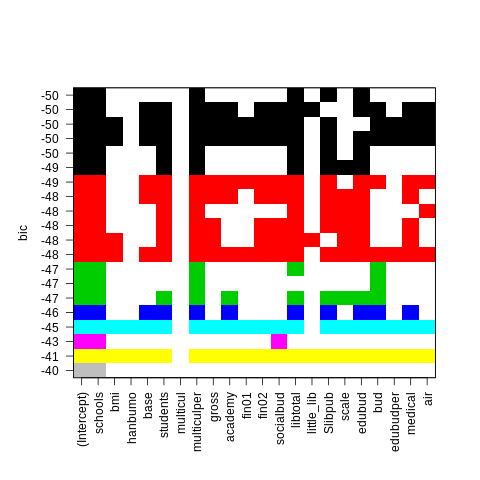

In [198]:
# bic 값 시각화
%%R
plot(seoul_allsubset, scale="bic", col = palette())

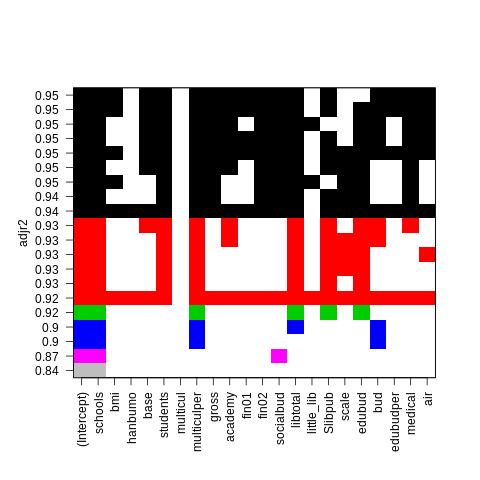

In [199]:
# 수정결정계수 시각화
%%R
plot(seoul_allsubset, scale="adjr2",col=palette())

In [200]:
%%R
model2 <- lm(dolbomplus~ schools+ multiculper+ edubud + libtotal+ Slibpub, data = seoul_data)
summary(model2)


Call:
lm(formula = dolbomplus ~ schools + multiculper + edubud + libtotal + 
    Slibpub, data = seoul_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.6176  -6.2671  -0.7232   6.5947  17.0432 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -7.1418    10.9273  -0.654 0.521219    
schools       3.5794     0.3983   8.986 2.86e-08 ***
multiculper 214.5663    91.8746   2.335 0.030639 *  
edubud        0.6722     0.2840   2.367 0.028709 *  
libtotal     -0.5260     0.1550  -3.394 0.003048 ** 
Slibpub       0.8855     0.2217   3.994 0.000777 ***
0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.775 on 19 degrees of freedom
Multiple R-squared:  0.9382,	Adjusted R-squared:  0.922 
F-statistic: 57.72 on 5 and 19 DF,  p-value: 7.907e-11



From cffi callback <function _consolewrite_ex at 0x7f6275d8aea0>:
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/rpy2/rinterface_lib/callbacks.py", line 125, in _consolewrite_ex
    @ffi_proxy.callback(ffi_proxy._consolewrite_ex_def,
KeyboardInterrupt


In [201]:
%%R
vif(model2)

    schools multiculper      edubud    libtotal     Slibpub 
   2.448974    1.249125    1.097220    1.888568    3.197004 


### 모델 결과

>   모델1    92.02%      신뢰수준 미달 변수 개수 : 1     VIF : 안정       총예측변수:  4

   모델2    93.82%      신뢰수준 미달 변수 개수 : 0     VIF : 안정       총예측변수:  5




### 최종모델선정
> 신뢰수준,결정계수,수정결정계수, AIC, BIC를 모두 고려한 결과
 예측변수 5개일때의 모델2가 가장 최적의 모델로 드러났다.


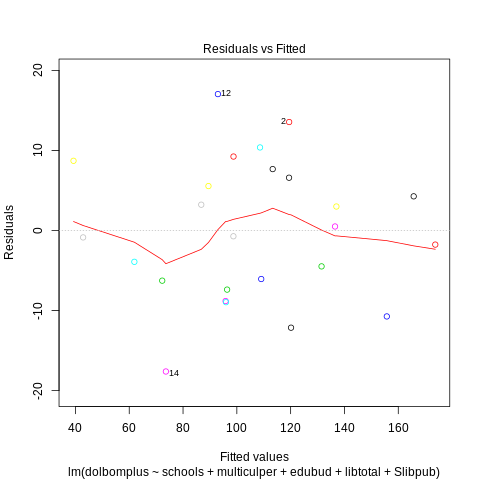

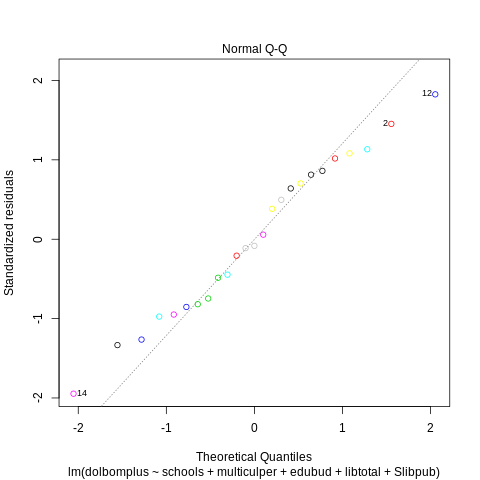

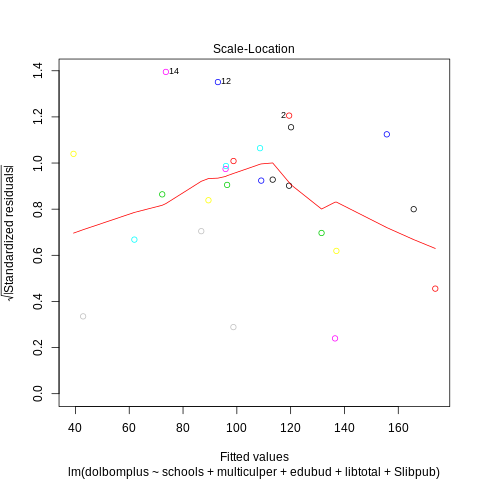

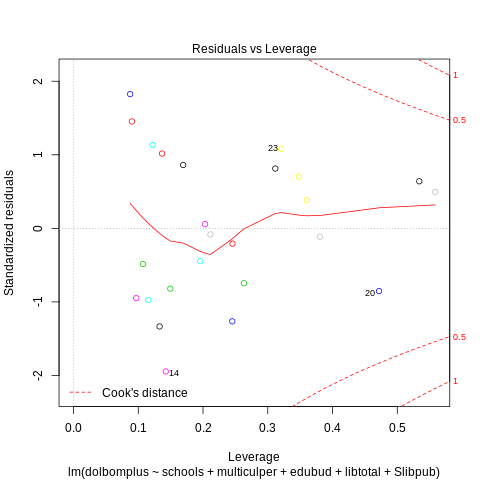

In [202]:
# 선정된 모델에 대한 회귀진단
%%R
plot(model2, col = palette(),bg = palette())

In [203]:
#정규화
%%R
seoul_norm <- transform(seoul_data, 
                        z.schools = scale(schools),
                        z.multiculper = scale(multiculper),
                        z.libtotal = scale(libtotal),
                        z.Slibpub = scale(Slibpub),
                        z.edubud = scale(edubud))
head(seoul_norm)

seoul_norm <- lm(dolbomplus ~ z.schools + z.multiculper + z.libtotal + z.Slibpub + z.edubud , data = seoul_norm)    
summary(seoul_norm)



Call:
lm(formula = dolbomplus ~ z.schools + z.multiculper + z.libtotal + 
    z.Slibpub + z.edubud, data = seoul_norm)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.6176  -6.2671  -0.7232   6.5947  17.0432 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    105.400      1.955  53.911  < 2e-16 ***
z.schools       28.061      3.123   8.986 2.86e-08 ***
z.multiculper    5.208      2.230   2.335 0.030639 *  
z.libtotal      -9.306      2.742  -3.394 0.003048 ** 
z.Slibpub       14.250      3.568   3.994 0.000777 ***
z.edubud         4.947      2.090   2.367 0.028709 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.775 on 19 degrees of freedom
Multiple R-squared:  0.9382,	Adjusted R-squared:  0.922 
F-statistic: 57.72 on 5 and 19 DF,  p-value: 7.907e-11



In [204]:
%%R
relweights <- function(fit,...){
  
  R <- cor(fit$model)
  nvar <- ncol(R)
  rxx <- R[2:nvar, 2:nvar]
  rxy <- R[2:nvar, 1]
  svd <- eigen(rxx)
  evec <- svd$vectors
  ev <- svd$values
  delta <- diag(sqrt(ev))
  lambda <- evec %*% delta %*% t(evec)
  lambdasq <- lambda ^ 2
  beta <- solve(lambda) %*% rxy
  rsquare <- colSums(beta ^ 2)
  rawwgt <- lambdasq %*% beta ^ 2
  import <- (rawwgt / rsquare) * 100
  import <- as.data.frame(import)
  row.names(import) <- names(fit$model[2:nvar])
  names(import) <- "Weights"
  import <- import[order(import),1, drop=FALSE]
  dotchart(import$Weights, labels=row.names(import),
           xlab="% of R-Square", pch=19,
           main="Relative Importance of Predictor Variables",
           sub=paste("Total R-Square=", round(rsquare, digits=3)),
           ...)
  return(import)
}

               Weights
edubud       0.6166512
multiculper  2.8061121
libtotal     4.7130338
Slibpub     33.2943594
schools     58.5698434


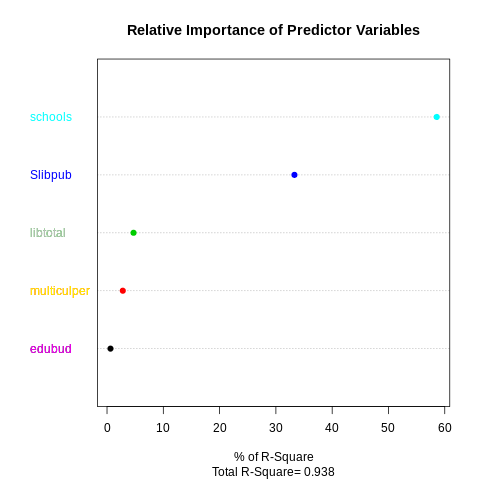

In [205]:
#변수 간 중요도 시각화 
%%R
result = relweights(model2, col=palette())
result

## 결론 1

돌봄센터수란, 현재 학교에서 운영중인 초등돌봄교실의 수, 지역에서 운영중인 지역아동센터수, 방과후아카데미 수, 다함께 돌봄센터 수를 전부 합한 총계이다.


현재 서울시 구별 돌봄센터수 예측에 채택된 변수는 (1)학교 수, (2)공공도서관+작은도서관 수, (3)도서관 수(국립,대학,전문,작은 총합), (4)다문화 학생수비율, (5)교육재정보조금 이다. 돌봄센터수는 서울시 구별 인프라와 재정에 따라 영향을 많이 받는 것으로 판단된다. 이를 지역 데이터에 적용해 지역별 현재 돌봄센터수와 예측한 돌봄센터 수 차이를 통해 가장 부족한 지역을 찾아내도록 한다. 

##Test 데이터 전처리

## Test 테이블 생성  

## Test 테이블에 모델적용

##결론 2